In [281]:
import tensorflow as tf
import matplotlib.pyplot as plt

% matplotlib inline


In [282]:
"""To start with our investigation of loss functions, we begin by looking at numerical loss functions. 
To do so, we must create a sequence of predictions around a target. For this exercise, we consider the target to be zero."""

# various predictins
x_vals = tf.linspace(-1., 1., 500)

target = tf.constant(0.)

interactive_session = tf.InteractiveSession()


In [283]:
"""L2 loss"""
# L = (pred - actual)^2
l2_loss = tf.square(x_vals - target)
l2_y_out = interactive_session.run(l2_loss)


In [284]:
"""L1 loss"""
# L = abs(pred - actual)
l1_loss = tf.abs(x_vals - target)
l1_y_out = interactive_session.run(l1_loss)


In [285]:
"""Pseudo Huber loss"""
# L = delta ^ 2 * (sqrt(1 + ((pred - actual) / delta) ^ 2) - 1)
"""The psuedo-huber loss function is a smooth approximation to the L1 loss as the (predicted - target) values get larger. 
When the predicted values are close to the target, the pseudo-huber loss behaves similar to the L2 loss."""
# Pseudo-Huber with delta = 0.25
delta = tf.constant(.25)
phuber_loss_1 = tf.multiply(tf.square(delta), tf.subtract(tf.sqrt(1 + tf.square((x_vals - target) / delta)), 1))
phuber1_y_out = interactive_session.run(phuber_loss_1)

# Pseudo-Huber with delta = 5
delta = tf.constant(5.)
phuber_loss_2 = tf.multiply(tf.square(delta), tf.subtract(tf.sqrt(1 + tf.square((x_vals - target) / delta)), 1))
phuber2_y_out = interactive_session.run(phuber_loss_2)


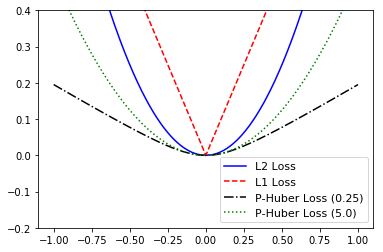

In [286]:
"""Plot the Regression Losses"""
"""Here we use Matplotlib to plot the L1, L2, and Pseudo-Huber Losses"""
x_array = interactive_session.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

In [287]:
# Various predicted X values
x_vals = tf.linspace(-3., 5., 500)

# Target of 1.0
target = tf.constant(1.)
targets = tf.fill([500, ], 1.)

In [288]:
# Hinge loss
"""The hinge loss is useful for categorical predictions. Here is is the max(0, 1-(pred*actual))"""

# Use for predicting binary (-1, 1) classes
# L = max(0, 1 - (pred * actual))

hinge_y_vals = tf.maximum(0., tf.subtract(1., tf.multiply(x_vals, target)))
hinge_y_out = interactive_session.run(hinge_y_vals)


In [289]:
# Cross Entropy Loss
"""The cross entropy loss is a very popular way to measure the loss between categorical targets and output model logits. 
You can read about the details more here: https://en.wikipedia.org/wiki/Cross_entropy"""

# Cross entropy loss
# L = -actual * (log(pred)) - (1-actual)(log(1-pred))

x_cross_entropy_y_vals = -tf.multiply(target,
                                      tf.subtract(tf.log(x_vals), tf.multiply(1. - target, tf.log(1. - x_vals))))
xentropy_y_out = interactive_session.run(x_cross_entropy_y_vals)


In [290]:
# Sigmoid Entropy Loss
"""TensorFlow also has a sigmoid-entropy loss function. 
This is very similar to the above cross-entropy function except that we take the sigmoid of the predictions in the function."""

# L = -actual * (log(sigmoid(pred))) - (1-actual)(log(1-sigmoid(pred)))
# or
# L = max(actual, 0) - actual * pred + log(1 + exp(-abs(actual)))
x_val_input = tf.expand_dims(x_vals, 1)
target_input = tf.expand_dims(targets, 1)
xentropy_sigmoid_y_vals = tf.nn.softmax_cross_entropy_with_logits(logits=x_val_input, labels=target_input)
xentropy_sigmoid_y_out = interactive_session.run(xentropy_sigmoid_y_vals)
# print(xentropy_sigmoid_y_out)


In [291]:
# Weighted (Softmax) Cross Entropy Loss
"""Tensorflow also has a similar function to the sigmoid cross entropy loss function above, 
but we take the softmax of the actuals and weight the predicted output instead."""

# Weighted (softmax) cross entropy loss
# L = -actual * (log(pred)) * weights - (1-actual)(log(1-pred))
# or
# L = (1 - pred) * actual + (1 + (weights - 1) * pred) * log(1 + exp(-actual))
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = interactive_session.run(xentropy_weighted_y_vals)
# print(xentropy_weighted_y_out)

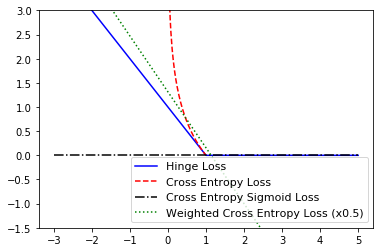

In [292]:
# Plot the output
x_array = interactive_session.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss (x0.5)')
plt.ylim(-1.5, 3)
#plt.xlim(-1, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()


In [293]:
"""Softmax entropy and Sparse Entropy"""
# Since it is hard to graph mutliclass loss functions, we will show how to get the output instead

# Softmax entropy loss
# L = -actual * (log(softmax(pred))) - (1-actual)(log(1-softmax(pred)))
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=unscaled_logits,
                                                           labels=target_dist)
print(interactive_session.run(softmax_xentropy))

# Sparse entropy loss
# Use when classes and targets have to be mutually exclusive
# L = sum( -actual * log(pred) )
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits,
                                                                 labels=sparse_target_dist)
print(interactive_session.run(sparse_xentropy))


[ 1.16012561]
[ 0.00012564]
